# Purdue Hackers Discord Growth Stats
### Because fun graphs are fun

Process:
- Export #lobby-archived into a text file using DiscordChatExporter
- Run notebook
- Show fun graphs to friends

TODO:
- Make it interactive somehow
- Ahaha Discord Bot? That would be sick
   - It would also be cool if the Discord Bot could export channels for us

### Libraries

In [1]:
import matplotlib
from matplotlib import pyplot as plt

import pandas as pd

import re

### Data Prep
There's probably better and more efficient ways of doing this but oh well... it works :pensive:

In [2]:
discord_log = open("discord-04-19-23.txt", encoding='utf-8')
discord_lines = discord_log.readlines()
num_users = 0
df_dict = {}
months = {}

index = 0

for line in discord_lines:
    exact_time = ""
    day_time = ""
    
    if line[0] == '[':
        exact_time = line[1:line.index(']')]
        day_time = line[1:10]
        month = line[4:10]
        join_or_leave_line = discord_lines[index + 5]
        number_line = discord_lines[index + 6]
        words = number_line.split()

        if "Member joined" in join_or_leave_line:
            user_number = words[-3]
                
            user_number = re.sub("[^0-9]", "", user_number)

            df_dict[day_time] = int(user_number)
            
    index = index + 1

## Look! Data Frames

### Total Members by Date

In [3]:
# note that 2/20/21 is when #lobby-archived was created
# which is why data starts at 22 members
members_df = pd.DataFrame(df_dict.values(), df_dict.keys())
members_df.columns = ['total_members']
members_df

,total_members
20-Feb-21,22
21-Feb-21,30
22-Feb-21,31
23-Feb-21,31
26-Feb-21,33
...,...
13-Apr-23,1335
14-Apr-23,1339
15-Apr-23,1340
18-Apr-23,1340


In [4]:
# difference shows how many members join and leave per day
members_df['difference'] = members_df.diff()
members_df['difference'] = members_df['difference'].fillna(0)
members_df = members_df.astype({"difference": int})
members_df

,total_members,difference
20-Feb-21,22,0
21-Feb-21,30,8
22-Feb-21,31,1
23-Feb-21,31,0
26-Feb-21,33,2
...,...,...
13-Apr-23,1335,1
14-Apr-23,1339,4
15-Apr-23,1340,1
18-Apr-23,1340,0


<AxesSubplot:>

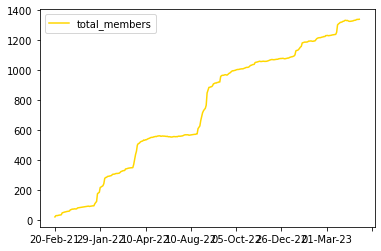

In [5]:
members_df.plot(y='total_members', color='gold')

<AxesSubplot:>

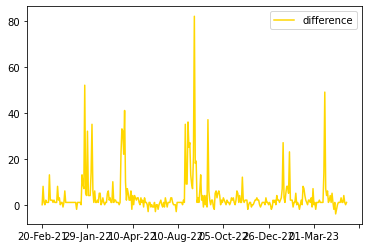

In [6]:
members_df.plot(y='difference', color='gold')

### Total Members by Month

In [7]:
total_members_by_month_dict = {}
for key in df_dict:
    month_key = key[3:]
    total_members_by_month_dict[month_key] = df_dict[key]
print(total_members_by_month_dict)

{'Feb-21': 33, 'Mar-21': 34, 'Apr-21': 35, 'Jun-21': 36, 'Aug-21': 49, 'Sep-21': 76, 'Nov-21': 86, 'Dec-21': 94, 'Jan-22': 226, 'Feb-22': 313, 'Mar-22': 501, 'Apr-22': 563, 'May-22': 557, 'Jun-22': 558, 'Jul-22': 570, 'Aug-22': 867, 'Sep-22': 997, 'Oct-22': 1039, 'Nov-22': 1060, 'Dec-22': 1080, 'Jan-23': 1188, 'Feb-23': 1232, 'Mar-23': 1332, 'Apr-23': 1341}


In [8]:
members_month_df = pd.DataFrame(total_members_by_month_dict.values(), total_members_by_month_dict.keys())
members_month_df.columns = ['total_members_by_month']
members_month_df

,total_members_by_month
Feb-21,33
Mar-21,34
Apr-21,35
Jun-21,36
Aug-21,49
Sep-21,76
Nov-21,86
Dec-21,94
Jan-22,226
Feb-22,313


In [9]:
members_month_df['difference_from_prev_month'] = members_month_df.diff()
members_month_df['difference_from_prev_month'] = members_month_df['difference_from_prev_month'].fillna(0)
members_month_df = members_month_df.astype({"difference_from_prev_month": int})
members_month_df

,total_members_by_month,difference_from_prev_month
Feb-21,33,0
Mar-21,34,1
Apr-21,35,1
Jun-21,36,1
Aug-21,49,13
Sep-21,76,27
Nov-21,86,10
Dec-21,94,8
Jan-22,226,132
Feb-22,313,87


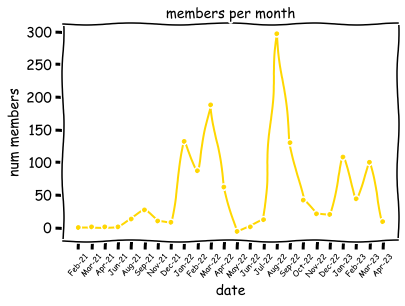

<Figure size 432x288 with 0 Axes>

In [10]:
months = list(members_month_df.index)
with plt.xkcd():
    plt.plot(months, members_month_df['difference_from_prev_month'], color='gold', marker='.')
    plt.title('members per month', fontsize=14)
    plt.xlabel('date', fontsize=14)
    plt.xticks(rotation = 50, fontsize=8)
    plt.ylabel('num members', fontsize=14)
    plt.grid(True)
    plt.show()

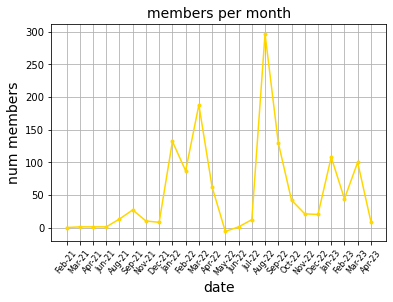

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(months, members_month_df['difference_from_prev_month'], color='gold', marker='.')
plt.title('members per month', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.xticks(rotation = 50, fontsize=8)
plt.ylabel('num members', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('monthly_growth_phax.png')

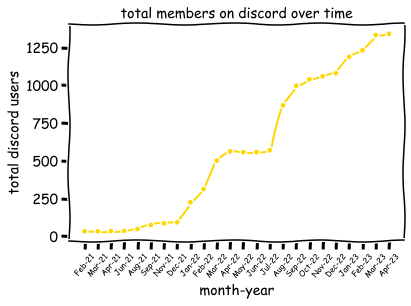

<Figure size 432x288 with 0 Axes>

In [12]:
with plt.xkcd():
    plt.plot(months, members_month_df['total_members_by_month'], color='gold', marker='.')
    plt.title('total members on discord over time', fontsize=14)
    plt.xlabel('month-year', fontsize=14)
    plt.xticks(rotation = 50, fontsize=8)
    plt.ylabel('total discord users', fontsize=14)
    plt.grid(True)
    plt.show()
    plt.savefig('running_total_phax_haha.png')

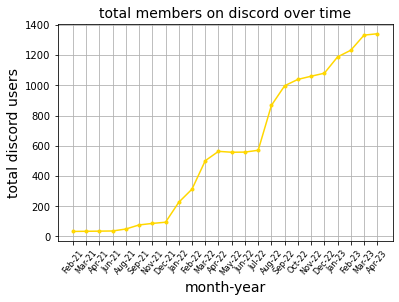

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(months, members_month_df['total_members_by_month'], color='gold', marker='.')
plt.title('total members on discord over time', fontsize=14)
plt.xlabel('month-year', fontsize=14)
plt.xticks(rotation = 50, fontsize=8)
plt.ylabel('total discord users', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('running_total_phax.png')